In [234]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [235]:
stdfield = pd.read_csv('Standard_Fielding_Table3.csv', float_precision = 'round_trip')

In [236]:
STDfield = stdfield.loc[stdfield.Year != 2020, ]
STDfield.shape

(630, 21)

In [237]:
STDfield = STDfield.drop(['Year', 'Tm', 'G'], axis = 1)
STDfield.shape

(630, 18)

In [238]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [239]:
x = STDfield.drop('Playoff', axis = 1)
y = STDfield.Playoff
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [240]:
xtrain.head()

,#Fld,RA/G,DefEff,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Rdrs,Rdrs/yr,Rgood
221,47,4.86,0.685,1458,1114,12756.0,5758,4252,1422,84,152,0.985,21,2,23,0,6
175,51,4.15,0.714,1458,1147,12753.0,5848,4251,1513,84,137,0.986,45,4,81,4,4
66,55,4.69,0.688,1458,1052,12909.0,5816,4303,1422,91,124,0.984,-28,-3,-32,0,7
313,61,3.46,0.723,1458,1021,13068.0,5748,4356,1303,89,94,0.985,29,3,36,0,-2
268,61,4.09,0.700,1458,1047,12648.0,5677,4216,1371,90,122,0.984,8,1,22,1,1


In [241]:
ytrain.head()

221    0
175    1
66     0
313    0
268    0
Name: Playoff, dtype: int64

## Setup for ML application

In [242]:
#import os
#cwd = os.getcwd()
#print(cwd)
#files = os.listdir(cwd)
#print("Files in %r: %s" % (cwd, files))
#for when python says its not in directory

In [276]:
MLstd2 = pd.read_csv('8:14std2.txt')
MLstd2.head()
#MLstd.info()

,Tm,#Fld,RA/G,DefEff,G,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Rdrs,Rdrs/yr,Rgood
0,Arizona Diamondbacks,51,4.49,0.702,113,1017,755,8967.0,4031,2989,974,68,96,0.983,12,2,23,-1,-3
1,Atlanta Braves,49,3.99,0.693,115,1035,852,9264.0,4136,3088,997,51,83,0.988,5,1,16,1,2
2,Baltimore Orioles,53,4.19,0.690,113,1017,793,8997.0,4114,2999,1047,68,99,0.983,-1,0,28,0,4
3,Boston Red Sox,46,4.77,0.687,115,1035,787,9243.0,4181,3081,1037,63,103,0.985,11,1,10,-2,-7
4,Chicago Cubs,53,4.77,0.687,112,1008,748,8994.0,4072,2998,1005,69,100,0.983,-15,-2,-10,-1,-2


In [277]:
# 2022 is not a full season!
notfull = [col not in ['Tm', 'G', 'Fld%', 'Rtot/yr', 'Rdrs/yr', '#Fld', 'DefEff'] for col in MLstd2.columns]
for col in MLstd2.columns[notfull]:
    MLstd2[col] = MLstd2[col] * (162 / MLstd2.G)

MLstd2.head()

,Tm,#Fld,RA/G,DefEff,G,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Rdrs,Rdrs/yr,Rgood
0,Arizona Diamondbacks,51,6.436991,0.702,113,1458.0,1082.389381,12855.345133,5778.955752,4285.115044,1396.353982,97.486726,137.628319,0.983,17.203540,2,32.973451,-1,-4.300885
1,Atlanta Braves,49,5.620696,0.693,115,1458.0,1200.208696,13050.156522,5826.365217,4350.052174,1404.469565,71.843478,116.921739,0.988,7.043478,1,22.539130,1,2.817391
2,Baltimore Orioles,53,6.006903,0.690,113,1458.0,1136.867257,12898.353982,5897.946903,4299.451327,1501.008850,97.486726,141.929204,0.983,-1.433628,0,40.141593,0,5.734513
3,Boston Red Sox,46,6.719478,0.687,115,1458.0,1108.643478,13020.573913,5889.756522,4340.191304,1460.817391,88.747826,145.095652,0.985,15.495652,1,14.086957,-2,-9.860870
4,Chicago Cubs,53,6.899464,0.687,112,1458.0,1081.928571,13009.178571,5889.857143,4336.392857,1453.660714,99.803571,144.642857,0.983,-21.696429,-2,-14.464286,-1,-2.892857


In [278]:
print(MLstd2.shape)

(30, 19)


In [279]:
MLstd3 = MLstd2.drop(['Tm', 'G'], axis = 1)

In [280]:
print(STDfield.shape)
print(MLstd3.shape)

(630, 18)
(30, 17)


## KNN

In [329]:
from sklearn.neighbors import KNeighborsClassifier
x = STDfield.drop('Playoff', axis = 1)
y = STDfield.Playoff
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier = KNeighborsClassifier()
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

In [330]:
knnypred = classifier.predict(xtest)
actual = ytest
from sklearn.metrics import classification_report, confusion_matrix
print(metrics.accuracy_score(knnypred, actual))

0.7341772151898734


In [331]:
KNML = classifier.predict(MLstd3)
KNML

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [332]:
KN_22stdfield = pd.DataFrame({'2022 Teams':MLstd2.Tm, 'Playoff Prediction':KNML})
KNtms22 = KN_22stdfield.loc[KN_22stdfield['Playoff Prediction'] == 1, '2022 Teams']

In [333]:
KNNtms22 = KNN_22stdfield.loc[KNN_22stdfield['Playoff Prediction'] == 1, '2022 Teams']
len(KNNtms22)

3

In [334]:
KNNtms22

7     Cleveland Guardians
10         Houston Astros
16        Minnesota Twins
Name: 2022 Teams, dtype: object

In [335]:
KN_playoff_teams = Counter()
for iteration in range(50): 
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)   
    classifier = KNeighborsClassifier()
    classifier.fit(xtrain, ytrain)
    KNML = classifier.predict(MLstd3)
    KN_22stdfield = pd.DataFrame({'2022 Teams':MLstd2.Tm, 'Playoff Prediction':KNML})
    KNtms22 = KN_22stdfield.loc[KN_22stdfield['Playoff Prediction'] == 1, '2022 Teams']
    KN_playoff_teams.update(list(KNtms22))

KN_playoff_teams

Counter({'Colorado Rockies': 10,
         'Los Angeles Dodgers': 11,
         'Seattle Mariners': 4,
         'St. Louis Cardinals': 14,
         'Toronto Blue Jays': 4,
         'Cincinnati Reds': 27,
         'Minnesota Twins': 29,
         'Cleveland Guardians': 12,
         'New York Yankees': 20,
         'Detroit Tigers': 4,
         'Pittsburgh Pirates': 9,
         'Texas Rangers': 15,
         'Boston Red Sox': 17,
         'Houston Astros': 21,
         'Atlanta Braves': 11,
         'Baltimore Orioles': 6,
         'Los Angeles Angels': 3,
         'Kansas City Royals': 1})

K nearest neighbors assesses the distance between data points and assumes those that are closer together are similar. When applied to the playoffs, the model assumes that based on the data of those who did make the playoffs, the teams with similar stats would also make the playoffs. The model has an accuracy score of around 73%, which is fairly good. 

## Gaussian Bayes

In [309]:
from sklearn import preprocessing
from sklearn.naive_bayes import CategoricalNB

In [336]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
x = STDfield.drop('Playoff', axis = 1)
y = STDfield.Playoff
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

fixing error for fit make things positive #not used for this code anymore but useful
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [337]:
nb.fit(xtrain, ytrain)

GaussianNB()

In [339]:
gauss = nb.predict(xtest)
print(metrics.accuracy_score(gauss, ytest))

0.6984126984126984


In [340]:
gaussml = nb.predict(MLstd3)
Gaussian_22stdfield = pd.DataFrame({'2022 Teams':MLstd2.Tm, 'Playoff Prediction':gaussml})
Gaussian_22stdfield.head(20)

,2022 Teams,Playoff Prediction
0,Arizona Diamondbacks,0
1,Atlanta Braves,0
2,Baltimore Orioles,0
3,Boston Red Sox,0
4,Chicago Cubs,0
5,Chicago White Sox,0
6,Cincinnati Reds,0
7,Cleveland Guardians,0
8,Colorado Rockies,0
9,Detroit Tigers,0


In [341]:
Gausstms22 = Gaussian_22stdfield.loc[Gaussian_22stdfield['Playoff Prediction'] == 1, '2022 Teams']
len(Gausstms22)
Gausstms22

10          Houston Astros
13     Los Angeles Dodgers
18        New York Yankees
24    San Francisco Giants
25     St. Louis Cardinals
Name: 2022 Teams, dtype: object

In [342]:
from collections import Counter
Gauss_playoff_teams = Counter()
for iteration in range(50): 
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)   
    nb = GaussianNB()
    nb.fit(xtrain, ytrain)
    gaussml = nb.predict(MLstd3)
    Gaussian_22stdfield = pd.DataFrame({'2022 Teams':MLstd2.Tm, 'Playoff Prediction':gaussml})
    Gausstms22 = Gaussian_22stdfield.loc[Gaussian_22stdfield['Playoff Prediction'] == 1, '2022 Teams']
    Gauss_playoff_teams.update(list(Gausstms22))

Gauss_playoff_teams

Counter({'Houston Astros': 50,
         'Los Angeles Dodgers': 50,
         'New York Yankees': 50,
         'St. Louis Cardinals': 35,
         'San Francisco Giants': 24,
         'Seattle Mariners': 10,
         'Colorado Rockies': 1})

Gaussian distribution is a normal distribution. The model is trained to find out different classifications for the data, and the model assumes that the different classifications follow a normal distribution. It uses conditional probability for each of the categories that contribute to an event, so with the playoffs, it uses conditional probability on stats like Defensive Efficiency etc. to find the probability of the team making the playoff. 

## Logistic Regression

In [355]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 42069)
x = STDfield.drop('Playoff', axis = 1)
y = STDfield.Playoff
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [356]:
log.fit(xtrain, ytrain)
log2 = log.predict(xtest)
print(metrics.accuracy_score(log2, ytest))

0.7151898734177216


In [357]:
logml = log.predict(MLstd3)
log_22stdfield = pd.DataFrame({'2022 Teams':MLstd2.Tm, 'Playoff Prediction':logml})

In [359]:
logtms22 = log_22stdfield.loc[log_22stdfield['Playoff Prediction'] == 1, '2022 Teams']
len(logtms22)

9

In [360]:
from collections import Counter
log_playoff_teams = Counter()
for iteration in range(50): 
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)   
    log = LogisticRegression(max_iter = 42069)
    log.fit(xtrain, ytrain)
    logml = log.predict(MLstd3)
    log_22stdfield = pd.DataFrame({'2022 Teams':MLstd2.Tm, 'Playoff Prediction':logml})
    logtms22 = log_22stdfield.loc[log_22stdfield['Playoff Prediction'] == 1, '2022 Teams']
    log_playoff_teams.update(list(logtms22))

log_playoff_teams

Counter({'Atlanta Braves': 42,
         'Chicago White Sox': 49,
         'Milwaukee Brewers': 50,
         'New York Yankees': 50,
         'San Diego Padres': 16,
         'San Francisco Giants': 44,
         'Tampa Bay Rays': 34,
         'Cleveland Guardians': 20,
         'Colorado Rockies': 18,
         'New York Mets': 4,
         'Texas Rangers': 15,
         'Washington Nationals': 10,
         'Houston Astros': 1})

Logistic Regression uses the input variables to predict a certain outcome. It uses the logit function, which is the log of probability divided by the opposing odds. Since it's a regression model, it finds the slope of the curve/line fitted to the data to look at the correlation between the team's stats and the probability of making it to the playoff. 

## accuracy scores

## logistic regression

In [361]:
from IPython.display import clear_output

In [366]:
log_accuracy_scores = []
log_playoff_team_counter = Counter()
log_model = LogisticRegression(max_iter = 42069)
log_iterations = 50 

for iteration in range(log_iterations):
    if iteration % 10 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
        
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    log_model.fit(xtrain, ytrain)
    
    logcheck = log_model.predict(xtest)
    log_accuracy_scores.append(metrics.accuracy_score(logcheck, ytest))
    
    log_2022 = log_model.predict(MLstd3)
    log_playoff_teams_2022 = MLstd2.Tm[log_2022 == 1]
    log_playoff_team_counter.update(list(log_playoff_teams_2022))


Started iteration 40


In [367]:
log_accuracy_scores = pd.Series(log_accuracy_scores)
log_accuracy_scores.describe()

count    50.000000
mean      0.698734
std       0.030635
min       0.645570
25%       0.677215
50%       0.696203
75%       0.715190
max       0.791139
dtype: float64

In [368]:
Log_predictions = pd.Series([count / log_iterations for count in log_playoff_team_counter.values()], 
                           index = log_playoff_team_counter.keys()
                          ).sort_values(ascending = False)
Log_predictions 

Milwaukee Brewers       1.00
New York Yankees        1.00
Chicago White Sox       0.96
San Francisco Giants    0.86
Atlanta Braves          0.84
Tampa Bay Rays          0.66
Texas Rangers           0.54
Colorado Rockies        0.34
Cleveland Guardians     0.32
San Diego Padres        0.20
Washington Nationals    0.18
Houston Astros          0.06
Baltimore Orioles       0.02
dtype: float64

In [369]:
len(Log_predictions)

13

## Gaussian Bayes

In [390]:
gauss_accuracy_scores = []
gauss_playoff_team_counter = Counter()
gauss_model = GaussianNB()
gauss_iterations = 5000 

for iteration in range(gauss_iterations):
    if iteration % 10 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
        
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    gauss_model.fit(xtrain, ytrain)
    
    gausscheck = gauss_model.predict(xtest)
    gauss_accuracy_scores.append(metrics.accuracy_score(gausscheck, ytest))
    
    gauss_2022 = gauss_model.predict(MLstd3)
    gauss_playoff_teams_2022 = MLstd2.Tm[gauss_2022 == 1]
    gauss_playoff_team_counter.update(list(gauss_playoff_teams_2022))

Started iteration 4990


In [391]:
gauss_accuracy_scores = pd.Series(gauss_accuracy_scores)
gauss_accuracy_scores.describe()

count    5000.000000
mean        0.658303
std         0.035810
min         0.550633
25%         0.632911
50%         0.658228
75%         0.683544
max         0.797468
dtype: float64

In [386]:
gauss_predictions = pd.Series([count / gauss_iterations for count in gauss_playoff_team_counter.values()], 
                           index = gauss_playoff_team_counter.keys()
                          ).sort_values(ascending = False)
gauss_predictions 

Houston Astros          0.0100
Los Angeles Dodgers     0.0100
New York Yankees        0.0100
St. Louis Cardinals     0.0078
San Francisco Giants    0.0058
Seattle Mariners        0.0022
dtype: float64

## KNN 

In [388]:
KNN_accuracy_scores = []
KNN_playoff_team_counter = Counter()
KNN_model = KNeighborsClassifier()
KNN_iterations = 5000 

for iteration in range(KNN_iterations):
    if iteration % 10 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
        
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    KNN_model.fit(xtrain, ytrain)
    
    KNNcheck = KNN_model.predict(xtest)
    KNN_accuracy_scores.append(metrics.accuracy_score(KNNcheck, ytest))
    
    KNN_2022 = KNN_model.predict(MLstd3)
    KNN_playoff_teams_2022 = MLstd2.Tm[KNN_2022 == 1]
    KNN_playoff_team_counter.update(list(KNN_playoff_teams_2022))


Started iteration 4990


In [393]:
KNN_accuracy_scores = pd.Series(KNN_accuracy_scores)
KNN_accuracy_scores.describe()

count    5000.000000
mean        0.713376
std         0.036786
min         0.556962
25%         0.689873
50%         0.715190
75%         0.740506
max         0.829114
dtype: float64

In [394]:
KNN_predictions = pd.Series([count / KNN_iterations for count in KNN_playoff_team_counter.values()], 
                           index = KNN_playoff_team_counter.keys()
                          ).sort_values(ascending = False)
KNN_predictions 

Cincinnati Reds          0.4644
Houston Astros           0.4482
Minnesota Twins          0.4482
Cleveland Guardians      0.2622
Texas Rangers            0.2618
Boston Red Sox           0.2602
Atlanta Braves           0.2554
New York Yankees         0.2488
Los Angeles Dodgers      0.2482
St. Louis Cardinals      0.1806
Pittsburgh Pirates       0.1780
Colorado Rockies         0.1750
Detroit Tigers           0.1168
Baltimore Orioles        0.0668
Los Angeles Angels       0.0664
Kansas City Royals       0.0654
Toronto Blue Jays        0.0584
Seattle Mariners         0.0542
Chicago Cubs             0.0086
San Diego Padres         0.0070
San Francisco Giants     0.0066
Miami Marlins            0.0064
Philadelphia Phillies    0.0056
dtype: float64

## ML Visualizations: Accuracy scores

In [378]:
import matplotlib.pyplot as plt

In [374]:
team_name_abbrevs = {'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL',
               'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW',
               'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL',
               'Detroit Tigers':'DET', 'Miami Marlins':'MIA', 'Houston Astros':'HOU', 
               'Kansas City Royals':'KC', 'Los Angeles Angels':'LAA', 'Los Angeles Dodgers':'LAD',
               'Milwaukee Brewers':'MIL', 'Minnesota Twins':'MIN', 'New York Mets':'NYM', 
               'New York Yankees':'NYY', 'Oakland Athletics':'OAK', 'Philadelphia Phillies':'PHI',
               'Pittsburgh Pirates':'PIT', 'San Diego Padres':'SD', 'San Francisco Giants':'SF',
               'Seattle Mariners':'SEA', 'St. Louis Cardinals':'STL', 'Tampa Bay Rays':'TB',
               'Texas Rangers':'TEX', 'Toronto Blue Jays':'TOR', 'Washington Nationals':'WSH'}

In [401]:
kwargs_hist = dict(edgecolor = 'k', color = 'palevioletred')
kwargs_kde = dict(kind = 'kde', color = 'turquoise')
kwargs_bar = dict(edgecolor = 'k', color = 'thistle')

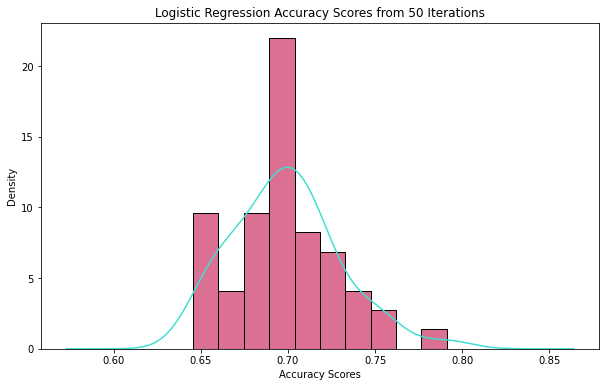

In [381]:
plt.figure(figsize = (10, 6))
plt.hist(log_accuracy_scores, density = True, **kwargs_hist) 
log_accuracy_scores.plot(**kwargs_kde) 
plt.title(f'Logisticb Regression Accuracy Scores from {log_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

In [415]:
kwargs_hist2 = dict(edgecolor = 'k', color = 'mediumseagreen')
kwargs_kde2 = dict(kind = 'kde', color = 'darkviolet')
kwargs_bar2 = dict(edgecolor = 'k', color = 'teal')

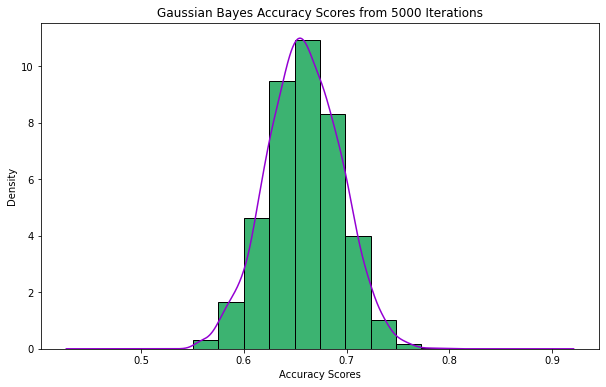

In [402]:
plt.figure(figsize = (10, 6))
plt.hist(gauss_accuracy_scores, density = True, **kwargs_hist2) 
gauss_accuracy_scores.plot(**kwargs_kde2) 
plt.title(f'Gaussian Bayes Accuracy Scores from {gauss_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

In [416]:
kwargs_hist3 = dict(edgecolor = 'k', color = 'burlywood')
kwargs_kde3 = dict(kind = 'kde', color = 'maroon')
kwargs_bar3 = dict(edgecolor = 'k', color = 'pink')

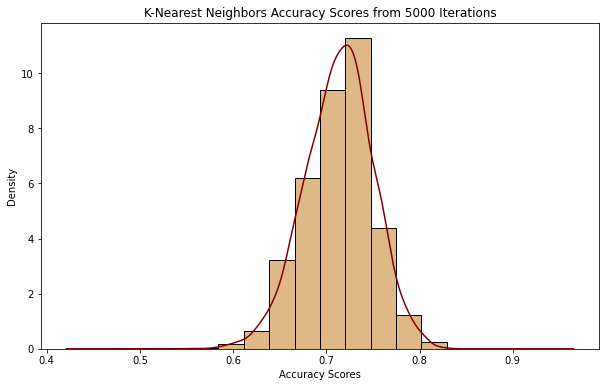

In [409]:
plt.figure(figsize = (10, 6))
plt.hist(KNN_accuracy_scores, density = True, **kwargs_hist3) 
KNN_accuracy_scores.plot(**kwargs_kde3) 
plt.title(f'K-Nearest Neighbors Accuracy Scores from {KNN_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

## ML Visualizations: Proportions??

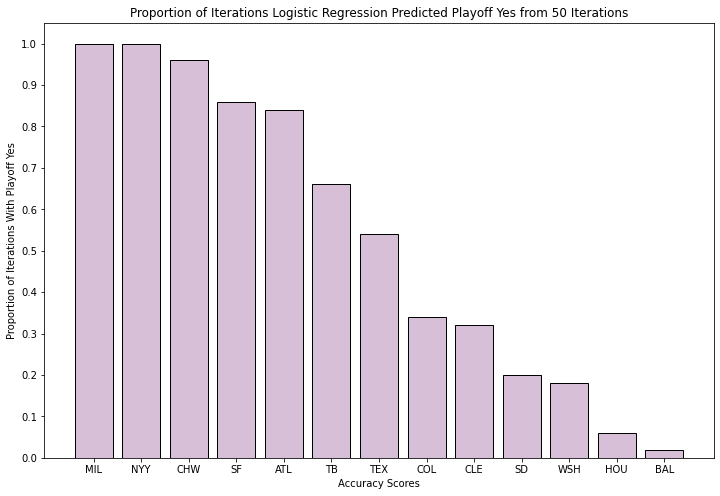

In [414]:
plt.figure(figsize = (12, 8))
plt.bar(range(len(Log_predictions)), Log_predictions, **kwargs_bar)
plt.title(f'Proportion of Iterations Logistic Regression Predicted Playoff Yes from {log_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(Log_predictions)), Log_predictions.index.map(team_name_abbrevs)) 
plt.yticks(np.arange(0, 1.1, step = 0.1)) 
plt.show()

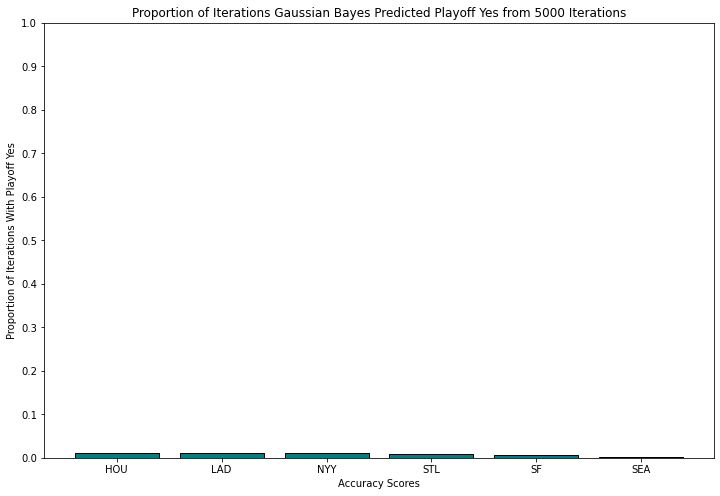

In [419]:
plt.figure(figsize = (12, 8))
plt.bar(range(len(gauss_predictions)), gauss_predictions, **kwargs_bar2)
plt.title(f'Proportion of Iterations Gaussian Bayes Predicted Playoff Yes from {gauss_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(gauss_predictions)), gauss_predictions.index.map(team_name_abbrevs)) 
plt.yticks(np.arange(0, 1.1, step = 0.1)) 
plt.show()

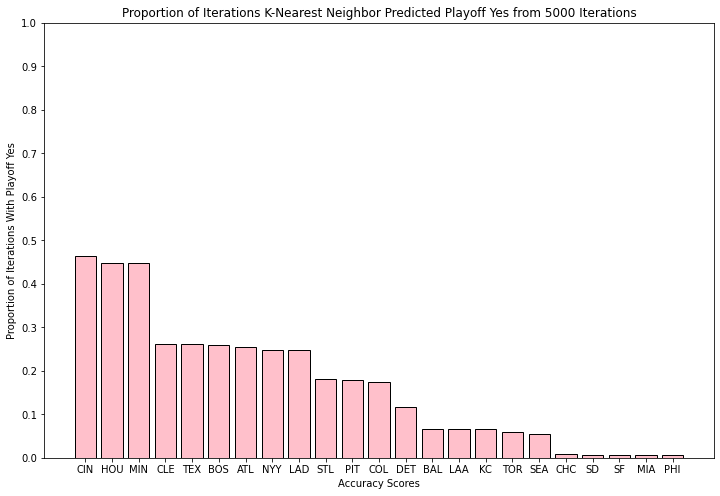

In [420]:
plt.figure(figsize = (12, 8))
plt.bar(range(len(KNN_predictions)), KNN_predictions, **kwargs_bar3)
plt.title(f'Proportion of Iterations K-Nearest Neighbor Predicted Playoff Yes from {KNN_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(KNN_predictions)), KNN_predictions.index.map(team_name_abbrevs)) 
plt.yticks(np.arange(0, 1.1, step = 0.1)) 
plt.show()